In [1]:
#Anshuman Prakash

import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

daf = pd.read_csv("Dataset.csv")

## Preprocessing

In [2]:
daf.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH us,2019-01-31 00:00:00,2019.0,1.928636e+09,2019-01-16,20190117,20190116,20190131.0,USD,RV,1.0,NaN,56866.25,20190116.0,NAC6,1.928636e+09,0
1,U001,0200707822,PUBLI us,2019-06-05 00:00:00,2019.0,1.929359e+09,2019-05-21,20190522,20190521,20190605.0,USD,RV,1.0,NaN,21547.98,20190521.0,NAA8,1.929359e+09,0
2,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,20200317.0,USD,RV,1.0,NaN,51859.80,20200302.0,NAH4,1.930585e+09,1
3,U001,0200700919,US trust,2019-10-15 00:00:00,2019.0,1.929928e+09,2019-09-26,20190926,20190926,20191011.0,USD,RV,1.0,NaN,45008.37,20190926.0,NAA8,1.929928e+09,0
4,U001,0200762301,C&S WH associates,2019-07-05 00:00:00,2019.0,1.929519e+09,2019-06-19,20190620,20190619,20190704.0,USD,RV,1.0,NaN,23498.74,20190619.0,NAC6,1.929519e+09,0


In [3]:
daf=daf.drop(['area_business', #NaN values presentin whole column
              'cust_number', #only 2 unique values present
              'buisness_year', #only 2 unique values present
              'posting_id', #only 1 unique values present
              'doc_id', #not usefull column
              'document type', #not usefull column
              'document_create_date.1', #kept alternate column with almost same values
              'invoice_id', #not usefull column
              'isOpen', #not usefull column
              'document_create_date','baseline_create_date'
             ], axis = 1) #not usefull column

### Dropping duplicate rows

In [4]:
daf=daf.drop_duplicates(keep='first')

### Converting Datatypes

In [5]:
daf['clear_date']=pd.to_datetime(daf['clear_date'])
daf['posting_date'] = pd.to_datetime(daf['posting_date'], format='%Y-%m-%d')
daf['due_in_date'] = pd.to_datetime(daf['due_in_date'], format='%Y%m%d')
daf.head()

,business_code,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,C&S WH us,2019-01-31,2019-01-16,2019-01-31,USD,56866.25,NAC6
1,U001,PUBLI us,2019-06-05,2019-05-21,2019-06-05,USD,21547.98,NAA8
2,U001,WAL-MAR trust,NaT,2020-03-02,2020-03-17,USD,51859.80,NAH4
3,U001,US trust,2019-10-15,2019-09-26,2019-10-11,USD,45008.37,NAA8
4,U001,C&S WH associates,2019-07-05,2019-06-19,2019-07-04,USD,23498.74,NAC6


### Splitting dataframe

In [6]:
main_train=daf[daf.clear_date.isnull()==False]
main_test=daf[daf.clear_date.isnull()==True]
main_train.shape, main_test.shape

((39085, 8), (9667, 8))

### Sorting

In [7]:
main_train.sort_values(by=['posting_date'],inplace=True)

#### Created columns for delay1= clear_date - due_date

In [8]:
main_train['delay']=main_train.clear_date-main_train.due_in_date
main_train['delay']=main_train['delay'].astype(str)
main_train['delay'] = main_train['delay'].str.replace(' days', '')
main_train['delay']=pd.to_numeric(main_train['delay'])

In [9]:
main_train['due_day']=main_train['due_in_date'].dt.day
main_train['due_month']=main_train['due_in_date'].dt.month
main_train['due_year']=main_train['due_in_date'].dt.year

# Split data

In [10]:
X = main_train.drop('delay',axis=1)
y = main_train['delay']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.2,random_state=0 , shuffle = False)

In [12]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [13]:
X_train.shape , X_val.shape , X_test.shape

((31268, 11), (3908, 11), (3909, 11))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

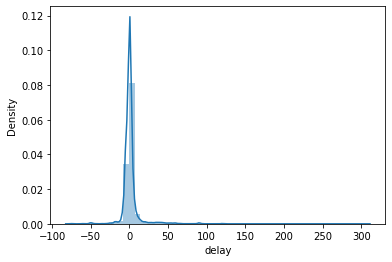

In [14]:
sns.distplot(y_train)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

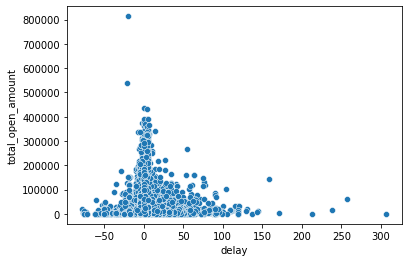

In [15]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

In [16]:
main_train.head()

,business_code,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay,due_day,due_month,due_year
12505,U001,FR corp,2019-01-14,2018-12-30,2019-01-14,USD,11539.68,NAA8,0,14,1,2019
35705,U001,BJ'S trust,2019-01-15,2018-12-30,2019-01-14,USD,164.70,NAA8,1,14,1,2019
22457,U001,COST co,2019-01-16,2018-12-30,2019-01-14,USD,1824.84,NAAX,2,14,1,2019
33531,U001,ALBERT foundation,2019-01-15,2018-12-30,2019-01-14,USD,96847.89,NAA8,1,14,1,2019
7192,U001,WAL-MAR corp,2019-01-09,2018-12-30,2019-01-14,USD,22222.17,NAH4,-5,14,1,2019


# Feature Engineering

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 12505 to 3081
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       31268 non-null  object        
 1   name_customer       31268 non-null  object        
 2   clear_date          31268 non-null  datetime64[ns]
 3   posting_date        31268 non-null  datetime64[ns]
 4   due_in_date         31268 non-null  datetime64[ns]
 5   invoice_currency    31268 non-null  object        
 6   total_open_amount   31268 non-null  float64       
 7   cust_payment_terms  31268 non-null  object        
 8   due_day             31268 non-null  int64         
 9   due_month           31268 non-null  int64         
 10  due_year            31268 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 2.9+ MB


#### Encoding business code

In [18]:
from sklearn.preprocessing import LabelEncoder
business_encoder = LabelEncoder()
business_encoder.fit(X_train['business_code'])
X_train['b_enc'] = business_encoder.transform(X_train['business_code'])
X_val['b_enc'] = business_encoder.transform(X_val['business_code'])
X_test['b_enc'] = business_encoder.transform(X_test['business_code'])

X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

#### Encodng payment terms

In [19]:
from sklearn.preprocessing import LabelEncoder
terms_encoder = LabelEncoder()

terms_encoder.fit(X_train['cust_payment_terms'])
X_train['terms_enc'] = terms_encoder.transform(X_train['cust_payment_terms'])

terms_encoder.fit(X_val['cust_payment_terms'])
X_val['terms_enc'] = terms_encoder.transform(X_val['cust_payment_terms'])

terms_encoder.fit(X_test['cust_payment_terms'])
X_test['terms_enc'] = terms_encoder.transform(X_test['cust_payment_terms'])

X_train.drop(['cust_payment_terms'],axis =1,inplace=True)
X_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

#### Encoding name

In [20]:
from sklearn.preprocessing import LabelEncoder
name_encoder = LabelEncoder()

name_encoder.fit(X_train['name_customer'])
X_train['name_enc'] = name_encoder.transform(X_train['name_customer'])

name_encoder.fit(X_val['name_customer'])
X_val['name_enc'] = name_encoder.transform(X_val['name_customer'])

name_encoder.fit(X_test['name_customer'])
X_test['name_enc'] = name_encoder.transform(X_test['name_customer'])

X_train.drop(['name_customer'],axis =1,inplace=True)
X_val.drop(['name_customer'],axis=1 , inplace=True)
X_test.drop(['name_customer'],axis=1 , inplace=True)

#### Encoding currency

In [21]:
from sklearn.preprocessing import LabelEncoder
curr_encoder = LabelEncoder()

curr_encoder.fit(X_train['invoice_currency'])
X_train['curr_enc'] = curr_encoder.transform(X_train['invoice_currency'])

curr_encoder.fit(X_val['invoice_currency'])
X_val['curr_enc'] = curr_encoder.transform(X_val['invoice_currency'])

curr_encoder.fit(X_test['invoice_currency'])
X_test['curr_enc'] = curr_encoder.transform(X_test['invoice_currency'])

X_train.drop(['invoice_currency'],axis=1,inplace=True)
X_val.drop(['invoice_currency'],axis=1 , inplace=True)
X_test.drop(['invoice_currency'],axis=1 , inplace=True)

### Dropping clear_date, posting_date, due_in_date

In [22]:
X_train.drop(['clear_date'],axis=1,inplace=True)
X_val.drop(['clear_date'],axis=1 , inplace=True)
X_test.drop(['clear_date'],axis=1 , inplace=True)

In [23]:
X_train.drop(['posting_date'],axis =1,inplace=True)
X_val.drop(['posting_date'],axis=1 , inplace=True)
X_test.drop(['posting_date'],axis=1 , inplace=True)

In [24]:
X_train.drop(['due_in_date'],axis =1,inplace=True)
X_val.drop(['due_in_date'],axis=1 , inplace=True)
X_test.drop(['due_in_date'],axis=1 , inplace=True)

In [25]:
X_train.head()

,total_open_amount,due_day,due_month,due_year,b_enc,terms_enc,name_enc,curr_enc
12505,11539.68,14,1,2019,1,20,1174,1
35705,164.70,14,1,2019,1,20,382,1
22457,1824.84,14,1,2019,1,22,715,1
33531,96847.89,14,1,2019,1,20,85,1
7192,22222.17,14,1,2019,1,33,3478,1


In [26]:
X_train['total_open_amount']=X_train['total_open_amount'].astype(int)
X_val['total_open_amount']=X_val['total_open_amount'].astype(int)
X_test['total_open_amount']=X_test['total_open_amount'].astype(int)

# Feature Selection

<AxesSubplot:>

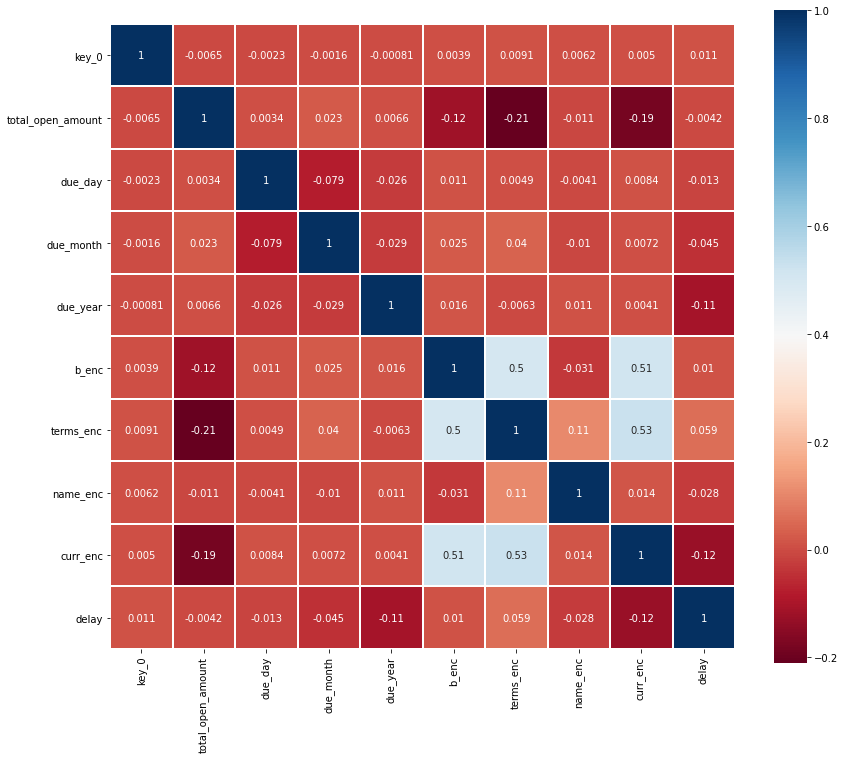

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

 # Decision Tree based model

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=8)

regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_val)

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

8.87255588607735

In [30]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

11.544379603828434

### Preprocessing on main_test

In [31]:
main_test.sort_values(by=['posting_date'],inplace=True)

In [32]:
main_test['delay']=main_test.clear_date-main_test.due_in_date
main_test['delay']=main_test['delay'].astype(str)
main_test['delay']=main_test['delay'].str.replace(' days', '')
main_test['delay']=pd.to_numeric(main_train['delay'])

In [33]:
main_test['due_day']=main_test['due_in_date'].dt.day
main_test['due_month']=main_test['due_in_date'].dt.month
main_test['due_year']=main_test['due_in_date'].dt.year

### Dropping target column from main_test

In [34]:
X_maintest = main_test.drop(['delay'],axis=1)
main_test.drop(['delay'], inplace =True,axis=1)

### Feature engineering on X_maintest

In [35]:
business_encoder.fit(X_maintest['business_code'])
X_maintest['b_enc'] = business_encoder.transform(X_maintest['business_code'])
X_maintest.drop(['business_code'],axis=1 , inplace=True)

In [36]:
terms_encoder.fit(X_maintest['cust_payment_terms'])
X_maintest['terms_enc'] = terms_encoder.transform(X_maintest['cust_payment_terms'])
X_maintest.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [37]:
name_encoder.fit(X_maintest['name_customer'])
X_maintest['name_enc'] = name_encoder.transform(X_maintest['name_customer'])
X_maintest.drop(['name_customer'],axis=1 , inplace=True)

In [38]:
curr_encoder.fit(X_maintest['invoice_currency'])
X_maintest['curr_enc'] = curr_encoder.transform(X_maintest['invoice_currency'])
X_maintest.drop(['invoice_currency'],axis=1 , inplace=True)

In [39]:
X_maintest.drop(['clear_date'],axis=1,inplace=True)
X_maintest.drop(['posting_date'],axis=1 , inplace=True)
X_maintest.drop(['due_in_date'],axis=1 , inplace=True)
X_maintest['total_open_amount']=X_maintest['total_open_amount'].astype(int)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 12505 to 3081
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_open_amount  31268 non-null  int32
 1   due_day            31268 non-null  int64
 2   due_month          31268 non-null  int64
 3   due_year           31268 non-null  int64
 4   b_enc              31268 non-null  int32
 5   terms_enc          31268 non-null  int32
 6   name_enc           31268 non-null  int32
 7   curr_enc           31268 non-null  int32
dtypes: int32(5), int64(3)
memory usage: 1.6 MB


In [41]:
X_maintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 39132 to 46974
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_open_amount  9667 non-null   int32
 1   due_day            9667 non-null   int64
 2   due_month          9667 non-null   int64
 3   due_year           9667 non-null   int64
 4   b_enc              9667 non-null   int32
 5   terms_enc          9667 non-null   int32
 6   name_enc           9667 non-null   int32
 7   curr_enc           9667 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 490.9 KB


# Final Prediction on X_maintest

In [42]:
result = regressor.predict(X_maintest)
result = pd.Series(result,name='delay')

In [43]:
main_test.reset_index(drop=True,inplace=True)

In [44]:
Output = main_test.merge(result , on = X_maintest.index )

In [45]:
Output.delay.unique()

array([ -6.39393939,   3.90613267,   0.77777778,   0.22350922,
         1.6689847 ,   1.86743516,   2.71794872, -16.83333333,
        -2.97272727,  -5.87931034,  -9.        ,  26.83333333,
        38.66666667, -15.        ,   3.84615385,  10.        ,
         7.33333333, -19.        ,  95.        ,   2.73846154,
         0.82012148])

In [46]:
Output.delay=Output.delay.astype(int)

In [47]:
Output

,key_0,business_code,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,due_day,due_month,due_year,delay
0,39132,U001,MCLANE co,NaT,2020-02-27,2020-03-13,USD,19813.50,NAA8,13,3,2020,-6
1,27480,CA02,METRO in,NaT,2020-02-27,2020-03-08,CAD,71183.82,CA10,8,3,2020,3
2,11706,U001,FOOD systems,NaT,2020-02-27,2020-03-13,USD,10174.64,NAA8,13,3,2020,0
3,3385,U001,WAL-MAR trust,NaT,2020-02-27,2020-03-13,USD,6868.40,NAH4,13,3,2020,0
4,5048,U001,SA in,NaT,2020-02-27,2020-04-12,USD,100077.67,NAWP,12,4,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,17403,U001,SHAM co,NaT,2020-05-15,2020-05-30,USD,19798.67,NAA8,30,5,2020,-6
9663,47686,U001,NATURA llc,NaT,2020-05-16,2020-05-31,USD,14698.55,NAA8,31,5,2020,-6
9664,25391,U001,MAINES systems,NaT,2020-05-18,2020-06-02,USD,16099.20,NAA8,2,6,2020,-6
9665,24958,U001,MAINES systems,NaT,2020-05-18,2020-06-02,USD,20756.50,NAA8,2,6,2020,-6


### Forming and assigning value to clear_date

In [48]:
Output['clear_date']=Output['due_in_date']

In [49]:
temp = Output['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))
Output['clear_date'] = Output['clear_date'] + temp

In [50]:
Output.drop(['due_day'],axis=1,inplace=True)
Output.drop(['due_month'],axis=1,inplace=True)
Output.drop(['due_year'],axis=1,inplace=True)

In [51]:
Output

,key_0,business_code,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
0,39132,U001,MCLANE co,2020-03-07,2020-02-27,2020-03-13,USD,19813.50,NAA8,-6
1,27480,CA02,METRO in,2020-03-11,2020-02-27,2020-03-08,CAD,71183.82,CA10,3
2,11706,U001,FOOD systems,2020-03-13,2020-02-27,2020-03-13,USD,10174.64,NAA8,0
3,3385,U001,WAL-MAR trust,2020-03-13,2020-02-27,2020-03-13,USD,6868.40,NAH4,0
4,5048,U001,SA in,2020-04-13,2020-02-27,2020-04-12,USD,100077.67,NAWP,1
...,...,...,...,...,...,...,...,...,...,...
9662,17403,U001,SHAM co,2020-05-24,2020-05-15,2020-05-30,USD,19798.67,NAA8,-6
9663,47686,U001,NATURA llc,2020-05-25,2020-05-16,2020-05-31,USD,14698.55,NAA8,-6
9664,25391,U001,MAINES systems,2020-05-27,2020-05-18,2020-06-02,USD,16099.20,NAA8,-6
9665,24958,U001,MAINES systems,2020-05-27,2020-05-18,2020-06-02,USD,20756.50,NAA8,-6


## Forming Buckets

In [52]:
bins = [-30, -15, 0, 15, 30, 45, 60, 75, 90, 105]
labels =[1,2,3,4,5,6,7,8,9]
Output['bucket'] = pd.cut(Output['delay'], bins,labels=labels)
Output

,key_0,business_code,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay,bucket
0,39132,U001,MCLANE co,2020-03-07,2020-02-27,2020-03-13,USD,19813.50,NAA8,-6,2
1,27480,CA02,METRO in,2020-03-11,2020-02-27,2020-03-08,CAD,71183.82,CA10,3,3
2,11706,U001,FOOD systems,2020-03-13,2020-02-27,2020-03-13,USD,10174.64,NAA8,0,2
3,3385,U001,WAL-MAR trust,2020-03-13,2020-02-27,2020-03-13,USD,6868.40,NAH4,0,2
4,5048,U001,SA in,2020-04-13,2020-02-27,2020-04-12,USD,100077.67,NAWP,1,3
...,...,...,...,...,...,...,...,...,...,...,...
9662,17403,U001,SHAM co,2020-05-24,2020-05-15,2020-05-30,USD,19798.67,NAA8,-6,2
9663,47686,U001,NATURA llc,2020-05-25,2020-05-16,2020-05-31,USD,14698.55,NAA8,-6,2
9664,25391,U001,MAINES systems,2020-05-27,2020-05-18,2020-06-02,USD,16099.20,NAA8,-6,2
9665,24958,U001,MAINES systems,2020-05-27,2020-05-18,2020-06-02,USD,20756.50,NAA8,-6,2


# Hence clear_date on which payment will possibly be done is predicted